# Data science for Machine Learning
## Topics from data science and data mining used in ML

Mehrdad Yazdani <br>
@crude2refined

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from IPython.display import display, HTML, Image

%matplotlib inline

# Overview

- What is machine learning? What are we going to cover in this class?


- Linear binary classification models
    - Naive Bayes classifier
    - Logistic Regression
  

- Model evaluation and testing
   - Training and test set set
   - Cross validation 
   - Performance metrics

# What is machine learning?

- Algorithms that derive rules based on data
- Closely related to statistics
- Using a lot of linear algebra and optimization
- Significant overlap between terms such as "AI" (as used in 2017), ML, data science, data mining, analytics
- We expect data to be "structured" or made to be "structured"
    - data should embedded in a vector space


In [2]:
display(HTML('''<img src="./imgs/Lecture-1/Data_Science_VD.png">'''))

# Intersection of different skills


<img src="./imgs/Lecture-1/data-science-venn.jpg">

# Intersection of different skills


<img src="./imgs/Lecture-1/vd_overload.jpg">

# Intersection of different skills


<img src="./imgs/Lecture-1/VENN.png">

## Supervised vs. unsupervised learning

- Supervised learning:
    - Decision making
    - Estimation, prediction
    - Classification
    - Outlier detection 


- Unsupervised learning:
    - Summarization
    - Compression
    - Clustering
    - Template matching
    - Outlier detection or density estimation 
   
   
- Always ask: what type of problem are you trying to solve? 

- It is not unusual to use a combination of both methods to solve a specific problem.

# Classification vs Regression 

- Classification: when the "decision" we want to make is of categories 
    - Does a patient have cancer?
    - Should a loan be given or not?
    - Is this email spam or not?
    
    
- Regression: when the "decision" we want to make is a continuous variable   
    - How much is this house worth?
    - How risky is this loan?
    - What is this person's BMI?

# Classification vs Regression

<img src="./imgs/Lecture-1/ML-pipe.png">

- Can think of supervised learning as learning a "black box" that transforms the input to a desired output
- Regression: the output $y \in \mathbb{R}$
    - Usually can be generalized easily to multiple outputs $y \in \mathbb{R}^{m}$
- Classification: the output is one of $m$ categories $y \in \{0, 1, \ldots, m -1\}$ 


- We can think of characterizing this black box as a function $f(x)$ that maps inputs from $x \in \mathbb{R}^{n}$ to outputs $y$ 

# Supervised learning pipeline: prepare, learn, and evaluate

1. **Prepare** a dataset with lots of input and output examples: $\{(x_{i}, y_{i}) : i = 1, \ldots, N\}$. A large potion of this step may be preparing the data so that $x_i \in \mathbb{R}^n$.
2. **Learn** a model (that is, a function) that maps inputs $x$ to the outputs $y$. In other words, find  a function $f(\cdot)$ based on the the input $x_i$ and output $y_i$ example pairs that you have so that $f(x) \rightarrow y$. Learning is typically done as an optimization function that minimizes a loss function. 
3. **Evaluate**how accurate the model $f(x)$ is for *future* or unseen data


- How do we get *future* data?

# A hack solution to get unseen data

- Split the data set randomly into 3 sets: training set, validation set, test set
- Use the training and validation sets to build the model $f(x)$
- Use the test set as a proxy for "future" or unseen data to test and measure the performance of $f(x)$
    - Sometimes the training and validation sets are merged so we really have just two sets: training and test sets
- There is no guarantee that the test set represents future data!

<img src="./imgs/Lecture-1/train-val-test.png">

# k-fold cross validation

- Some may be skeptical that a single split is not robust enough to capture all the variations that we may get in unseen data. 
- k-fold cross validation is a common method for testing capturing the variability of unseen data
- Instead of relying on a single test set, we repeat the experiment k-times and are able to get performance bounds

<img src="./imgs/Lecture-1/5-fold.png">

- We often perform *stratified* k-fold: we want each fold to have a similar distribution of targets as the original dataset

# Data preparation 

- Data cleaning:
    - Outliers
    - Missing values
    - Data scale (should data be strictly positive? does negative mean something different?)


- Data embedding:
    - How do we encode non-numeric data into a vector embedding?
        - one-hot-encoding 

# Learning: finding a function that optimizes an objective function

- Typically we want to find a function $f$ that maps between the inputs and outputs and optimizes over an objective function
- A common objective function is the Expected loss:

$$\underset{f}{\text{argmin}} \int p(x,y) L(f(x), y) dx dy$$

- In the case of classification the Expected loss could just be:

$$ L(f(x), y) = \left\{\begin{matrix}
0 & \text{if } f(x) = y \\ 
c & \text{other wise}
\end{matrix}\right. $$

- For $c > 0$ this is called the "0-1 loss"
- The engineer should design the loss function if assumptions of the problem changes

# Binary classification example: activity vs. stationary recognition

- A wearable device that takes sensor measurements on a time window is worn by several subjects
- Video cameras monitor what the subjects are doing while wearing the device. Each frame in the camera has been "tagged" with the activity the user is engaged in
- We want to build a classifier that predicts based on the sensor measurements if the user is active (moving) or idle (not moving, stationary, etc.)


- Given a set of sensor measurements $x$, what is the activity $y$?


- $ y \in \{\text{active}, \text{idle}\}$
- $ y \in \{0, 1\}$




In [3]:
df = pd.read_csv("./data/trian-har.csv")

df.head()




,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [5]:
df_subject = df[df.subject == 1]

print("The shape of the data is", df_subject.shape)

print("\nThe different activities in the data are:")
for a in  list(pd.unique(df_subject.Activity)):
    print(a)

The shape of the data is (347, 563)

The different activities in the data are:
STANDING
SITTING
LAYING
WALKING
WALKING_DOWNSTAIRS
WALKING_UPSTAIRS


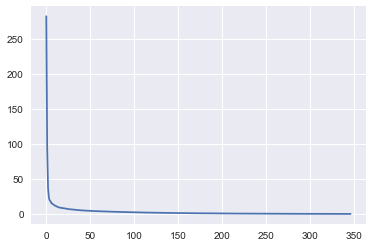

In [6]:
data = np.array(df_subject.iloc[:,:-2])

U, s, V = np.linalg.svd(data)
plt.plot(s);

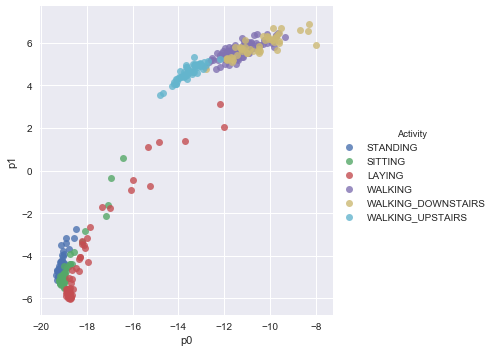

In [7]:
data_projected = pd.DataFrame(np.dot(V, data.T).T, columns= ["p" + str(i) for i in range(data.shape[1])])
data_projected["Activity"] = list(df_subject.Activity)



sns.lmplot(x = "p0", y = "p1", hue = "Activity", fit_reg=False, legend=True, data = data_projected)

In [12]:
len(list(df_subject.Activity))

347

In [14]:
#data_projected.columns.values
data_projected.index

RangeIndex(start=0, stop=347, step=1)

C:\Anaconda4\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


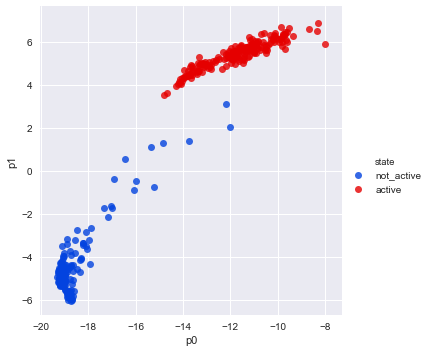

In [19]:
data_projected["state"] = "not_active"
data_projected["state"][data_projected["Activity"].str.contains("WALKING")] = "active"

colors = ["blue", "red"]

sns.lmplot(x = "p0", y = "p1", hue = "state", fit_reg=False, legend=True, data = data_projected, palette=sns.xkcd_palette(colors[0:2]))

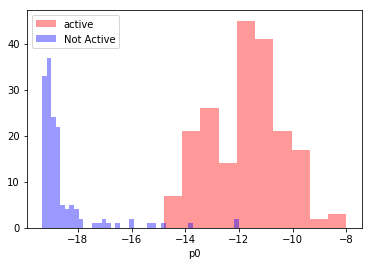

In [9]:
sns.distplot( data_projected["p0"][data_projected.state == "active" ], kde = False, color= "red", label="active")
sns.distplot( data_projected["p0"][data_projected.state != "active" ], kde = False, color= "blue", label="Not Active")
plt.legend();

# Likelihood ratio test:

$$ \frac{P(y = 1 | x)}{P(y = 0 | x)} = \theta$$

- If $\theta > 1$ then we say class 1. Otherwise class 0



# Log-Likelihood ratio test:


- It is common to compute the *log* likelihood ratio test

$$ \text{log} \frac{P(y = 1 | x)}{P(y = 0 | x)} = \eta$$
where $\eta = \text{log}(\theta)$

- Now we say if $\eta > 0$, then we have class 1. Otherwise class 0

# Single Variate Gaussian distribution 

$$ f(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp \big( -\dfrac{1}{2\sigma^{2}} (x - \mu)^{2} \big)$$

<img src="./imgs/Lecture-1/normal-pdf.png">


$\mu = E[X]$

$\sigma^{2} = Var[X] \triangleq E[\left(X - E\left(X\right)\right)^2]$


$\begin{align*}
E[\left(X - E[X]\right)^2] &= E[X^2 -2E[X]X + E[X]^2]\\
&= E[X^2] - 2E[X]E[X] + E[X]^2\\
&= E[X^2] - E[X]^2\\
\end{align*}
$



In [28]:
from sklearn.model_selection import train_test_split

X = np.array(data_projected.p0)
y = np.zeros(X.shape[0])
y[data_projected.state == "active"] = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11)

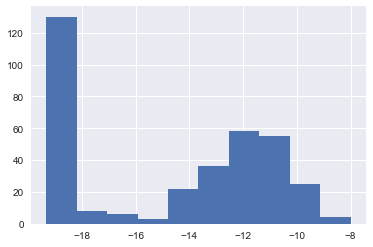

In [29]:
plt.hist(X);

In [30]:

## optimization process: MLE fit to single variate gaussian 
##
## !warning! this method is *still* suffering from data "leakage" 
## 
mu_active = np.mean(X_train[y_train == 1])
var_active = np.var(X_train[y_train == 1])

mu_idle = np.mean(X_train[y_train == 0])
var_idle = np.var(X_train[y_train == 0])

def single_variate_normal_dist_decision(x, mu0, mu1, var0, var1):
    dec = (x - mu0)**2/(2*var0) - (x - mu1)**2/(2*(var1)) + .5*np.log(var0/var1)
    if dec > 0:
        return 1
    else:
        return 0

# formula for above (from class)

seems above formula is incorrect. It should be:

dec = (x - mu0)\*\*2/(2\*var0)\*\*2 - (x - mu1)\*\*2/(2\*(var1)\*\*2) + np.log(var0/var1)

Note: The RED curve in hist is showing P(y=1|x) or P(x|y=1)? It is P(x|y=1). check the vidoe for more details, and instructuror corrected later. 

<img src="./imgs/Lecture-1/mu_var_formula.png">

In [31]:
x = np.linspace(-20, -8, num = 200)
y = np.zeros_like(x)
y[:10]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

-15.198187476241628

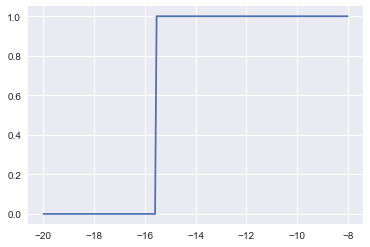

In [32]:
x = np.linspace(-20, -8, num = 200)
y = np.zeros_like(x)
for i in range(x.shape[0]):
    y[i] = single_variate_normal_dist_decision(x[i], mu1=mu_active, mu0 = mu_idle, var0=var_idle, var1=var_active)


plt.plot(x, y)

# note: the transition point in the plot won't be exact same as below because of var0/var1
.5*(mu_active+mu_idle)

-15.198187476241628

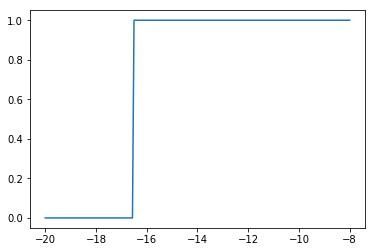

In [14]:
# increasing "uncertainty" in the positive class

x = np.linspace(-20, -8, num = 200)
y = np.zeros_like(x)
for i in range(x.shape[0]):
    y[i] = single_variate_normal_dist_decision(x[i], mu1=mu_active, mu0 = mu_idle, var0=var_idle, var1=10*var_active)


plt.plot(x, y)

.5*(mu_active+mu_idle)

In [15]:
y_pred = np.zeros_like(y_test)

for i in range(X_test.shape[0]):
    y_pred[i] = single_variate_normal_dist_decision(X_test[i], mu1=mu_active, mu0 = mu_idle, var0=var_idle, var1=var_active)
    
np.mean(y_pred == y_test)    

0.97391304347826091

# Bayes' rule


$$
P_{Y|X}(y|x) = \dfrac{P_{XY}(x,y)}{P_{X}(x)} = \dfrac{P_{X|Y}(x|y)P_Y(y)}{\sum_{y'}P_{X|Y}(x|y')P_Y(y')}.
$$


- Likelihood:
- Prior:
- Normalization/evidence:
- Posterior






# Bayesian Classifier

- In the binary classifier what we really want to find is:

$$p(y = 1 | x)$$
$$p(y = 0 | x)$$


- Computing these probabilities is usually very difficult, but using Bayes

$$
P(y = 1|x) = \dfrac{P_{XY}(x,y)}{P_{X}(x)} = \dfrac{P_{X|Y}(x|y)P_Y(y)}{\sum_{y'}P_{X|Y}(x|y')P_Y(y')}.
$$

Using Bayes' rule to do Log-Likelihood ratio test:
<img src="./imgs/Lecture-1/calculation using Bayes.png">

In [16]:
## optimization process: MLE fit to single variate gaussian 
##
## !warning! this method is *still* suffering from data "leakage" 
## 
mu_active = np.mean(X_train[y_train == 1])
var_active = np.var(X_train[y_train == 1])

mu_idle = np.mean(X_train[y_train == 0])
var_idle = np.var(X_train[y_train == 0])

def single_variate_normal_dist_bayes_decision(x, mu0, mu1, var0, var1, pos_prob):
    dec = (x - mu0)**2/(2*var0) - (x - mu1)**2/(2*(var1)) + .5*np.log(var0/var1) + np.log(pos_prob/(1-pos_prob))
    if dec > 0:
        return 1
    else:
        return 0    

In [17]:
num_pos_train = len(y_train[y_train==1])
pos_prob_train = num_pos_train/len(y_train) 
pos_prob_train

0.5862068965517241

-15.198187476241628

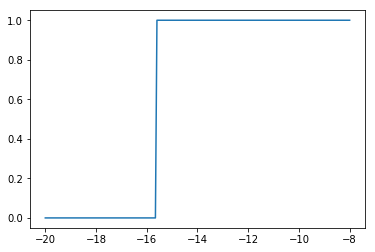

In [18]:
x = np.linspace(-20, -8, num = 200)
y = np.zeros_like(x)
for i in range(x.shape[0]):
    y[i] = single_variate_normal_dist_bayes_decision(x[i], mu1=mu_active, mu0 = mu_idle, 
                                                     var0=var_idle, var1=var_active, pos_prob = pos_prob_train)


plt.plot(x, y)

.5*(mu_active+mu_idle)

-15.198187476241628

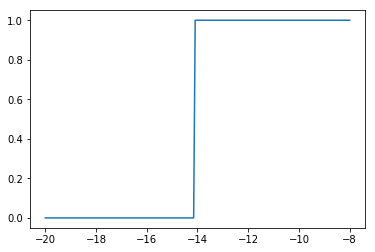

In [19]:
x = np.linspace(-20, -8, num = 200)
y = np.zeros_like(x)
for i in range(x.shape[0]):
    y[i] = single_variate_normal_dist_bayes_decision(x[i], mu1=mu_active, mu0 = mu_idle, 
                                                     var0=var_idle, var1=var_active, pos_prob = .001*pos_prob_train)


plt.plot(x, y)

.5*(mu_active+mu_idle)

In [20]:
y_pred = np.zeros_like(y_test)

for i in range(X_test.shape[0]):
    y_pred[i] = single_variate_normal_dist_bayes_decision(X_test[i], mu1=mu_active, mu0 = mu_idle, var0=var_idle, 
                                                          var1=var_active, pos_prob = pos_prob_train)
    
np.mean(y_pred == y_test)    

0.97391304347826091

# The multivariate Gaussian distribution

<img src="./imgs/Lecture-1/MultivariateNormal.png">

$$
f_{X_1,X_2,\ldots,X_n}(x_1,x_2,\ldots,x_n;\mu, \Sigma) = \dfrac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}}\exp \Bigg(-\dfrac{1}{2}(x - \mu)^T\Sigma^{-1}(x - \mu)\Bigg).
$$





# Covariance

$$
\begin{align*}
Cov[X,Y] &= E[(X - E[X])(Y - E[Y])]\\
&= E[XY - XE[Y] - YE[X] + E[X]E[Y]]\\
&= E[XY] -E[X]E[Y] - E[Y]E[X] + E[X]E[Y]]\\
&= E[XY] -E[X]E[Y].
\end{align*}
$$

- When $Cov[X,Y] = 0$, we say that $X$ and $Y$ are **uncorrelated**. 
- However, this is not the same thing as stating that $X$ and $Y$ are independent! 
- For example, if $X \sim Uniform(-1,1)$ and $Y = X^2$, then one can show that $X$ and $Y$ are uncorrelated, even though they are not independent.

# Covariance matrix: 

For a given random vector $X: \Omega \rightarrow \mathbb{R}^n$, its covariance matrix $\Sigma$ is the $n\times n$ square matrix whose entries are given by $\Sigma_{ij} = Cov[X_i, X_j]$.


From the definition of covariance, we have

$$
\begin{align*}
\Sigma &= \begin{bmatrix} Cov[X_1,X_1] & \cdots & Cov[X_1,X_n]\\
\vdots & \ddots & \vdots\\
Cov[X_n,X_1] & \cdots & Cov[X_n,X_n] \end{bmatrix}\\
&= E[XX^T] - E[X]E[X]^T = \ldots = E[(X - E[X])(X - E[X])^T].
\end{align*}
$$

where the matrix expectation is defined in the obvious way.

The covariance matrix has a number of useful properties:


- $\Sigma \succeq 0$; that is, $\Sigma$ is positive semidefinite.
- $\Sigma = \Sigma^T$; that is, $\Sigma$ is symmetric.



# Gausian Naive Bayes classifier

- Computing the covariance matrix can be very expensive 
- The Naive Bayes classifier makes the assumption that all covariats are 0 - that is, all pairs of variables are uncorrelated 
- So we assume that all off -diagonal terms of the covariance matrix are 0 and only compute the diagonal terms: these are just the standard deviations

$$
\begin{align*}
\Sigma &= \begin{bmatrix} \sigma_{1}^{2} & \cdots & 0\\
\vdots & \ddots & \vdots\\
0 & \cdots & \sigma_{n}^{2} \end{bmatrix}\\
\end{align*}
$$


$$
f_{X_1,X_2,\ldots,X_n}(x_1,x_2,\ldots,x_n;\mu, \Sigma) = \dfrac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}}\exp \Bigg(-\dfrac{1}{2}(x - \mu)^T\Sigma^{-1}(x - \mu)\Bigg).
$$




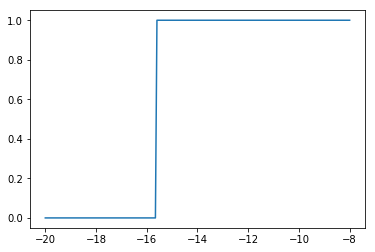

In [21]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train[:,np.newaxis], y_train)

x = np.linspace(-20, -8, num = 200)
x = x[:,np.newaxis]
y = np.zeros_like(x)
for i in range(x.shape[0]):
    y[i] = gnb.predict(x[i,np.newaxis])


plt.plot(x, y)

#this should look identical to what we had before!

In [22]:
gnb.class_prior_

array([ 0.4137931,  0.5862069])

In [23]:
X = np.array(data_projected.iloc[:,:4])
y = np.zeros(X.shape[0])
y[data_projected.state == "active"] = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape)

(232, 4)


In [24]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

np.mean(y_test == y_pred)

0.99130434782608701

# Logistic regression


- Let's revisit the ratio test:

$$ \text{log} \frac{P(y = 1 | x)}{P(y = 0 | x)} = \eta$$

- As before, if $\eta > 0$, then we have class 1. Otherwise class 0 


- We assumed so far that the probability model is from a Gaussian. But what we *directly* model the ratio test itself? 


- In logistic regression we assume that the log-likelihood ratio has a *linear* relationship to the features $x$. So if $x \in \mathbb{R}$

$$ \eta = w_{0} + w_{1}x$$

- In logistic regression, we solve an optimization problem to find the best $w_0$ and $w_1$


In [25]:
## Logistic Regression

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

np.mean(y_test == y_pred)

1.0

# Cheating and issues with our methods!

- Data leakage when computing the SVD on the *entire* data set: before splitting the data into train and test sets! (when we calucluate SVD, V is calculated from entire data set, then V is used to project data which is used as training set/test set afterwards.)


- Is randomly selecting examples a good way of creating a traing set for our problem here? (e.g. whether the training set is not randome enough, but picked more in "active" cycle? solution - split training/test set by class)


- Our model only works for *one* subject. What about other subjects? How transferrable is our model on other subjects?

In [26]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline


svd_gnb = Pipeline([('svd', TruncatedSVD(n_components = 1)), 
                   ('gnb', GaussianNB())])

X = data ## not using data_projected like before!
y = np.zeros(X.shape[0])
y[data_projected.state == "active"] = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11)

svd_gnb.fit(X_train, y_train);

y_pred = svd_gnb.predict(X_test)

np.mean(y_test == y_pred)

0.97391304347826091

# Evaluating binary classifiers: accuracy

- Accuracy: the percentage of correct classifications
    - Intuitively very easy to understand


- Can be misleading if there is class imbalance:
    - Example: less than 1% of credit card transactions are fraud. If you call all transactions as not fraud (that is, setting the threshold to 1 in the previous slide), then the accuracy is 99%!


# Binary classifiers terminology 


- True positives: positive classifications that are really positives
- False positives: positive classifications that are actually negatives
- True negative: negative classifications that are really negatives
- False negative: negative classifications that are actually positives

<img src="./imgs/Lecture-1/tpfp.png">

# Precision and recall

<center><img src="./imgs/Lecture-1/Precisionrecall.png">
</center>    

# Precision and recall
- Context: selecting a subset of credit transactions that might be fraudulent 
- **Precision**: of the transactions that I am investigating, how many are actually fraud and therefore won’t waste my time? 

- **Recall**: of the transactions that I am investigating, what fraud cases am I missing from by ignoring the remainder?

<center>

<img src="./imgs/Lecture-1/Precisionrecall-2.png">
</center>
- High precision: saves you time from having to deal with lots of False Positives

- High recall: ensures that you do not miss any instances of fraud


# Precision and recall combined


- Harmonin mean or **F1 score**: 
$$ F1 = 2\frac{\text{Precision}\times\text{Recall}}{\text{Precision}+ \text{Recall}}$$
- Simple arithmetic average can be misleading.
- It is easy to have a high recall (.99) and poor precision (.01) (this is usually not a good classifier). The simple average of this is 0.5, but the F1 score is more 0.0198

# Precision-recall curve

- Measure how precision varies as recall is improves

<img src="./imgs/Lecture-1/prec-recall.png">

- **Average precision**: the area under the precision-recall curve

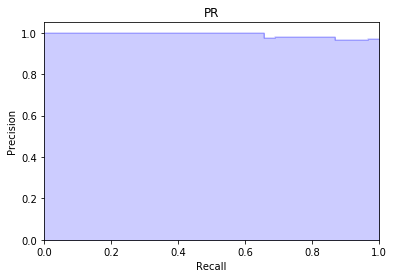

In [27]:
## plotting precision recall curves wrapper
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(y_test, y_score, title = ""):
    precision, recall, _ = precision_recall_curve(y_test, y_score)

    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                     color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(title)
    
plot_precision_recall_curve(y_test, svd_gnb.predict_proba(X_test)[:,1], "PR")    

# Receiver Operating Characteristic (ROC) curve

- True Positive Rate (aka Recall): True Positives over all positives $\frac{TP}{P}= \frac{FP}{TP + FN}$ 
- False Positive Rate: False Positives over all negative $\frac{FP}{N}= \frac{FP}{FP + N}$ 

<img src="./imgs/Lecture-1/random-auc.png">

- Area Under the ROC curve is referred to as AUC
- Random classifier always has AUC = 0.5

Text(0.5,1,'ROC curve')

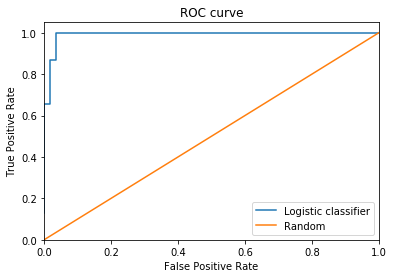

In [28]:
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, svd_gnb.predict_proba(X_test)[:,1], pos_label=1)

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
plt.legend(["Logistic classifier", "Random"], loc = "lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title("ROC curve")